In [1]:
#!/usr/bin/python
import csv
import time
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt

In [2]:
name2ID = {'Hawks': '1610612737','Celtics': '1610612738','Nets': '1610612751','Hornets': '1610612766','Bulls': '1610612741','Cavaliers': '1610612739','Mavericks': '1610612742','Nuggets': '1610612743','Pistons': '1610612765','Warriors': '1610612744','Rockets': '1610612745','Pacers': '1610612754','Clippers': '1610612746','Lakers': '1610612747','Grizzlies': '1610612763','Heat': '1610612748','Bucks': '1610612749','Timberwolves': '1610612750','Pelicans': '1610612740','Knicks': '1610612752','Thunder': '1610612760','Magic': '1610612753','76ers': '1610612755','Suns': '1610612756','Trail Blazers': '1610612757', 'Trailblazers': '1610612757','Kings': '1610612758','Spurs': '1610612759','Raptors': '1610612761','Jazz': '1610612762','Wizards': '1610612764'}
ID2name = {'1610612737':'Atlanta Hawks','1610612738':'Boston Celtics','1610612751':'Brooklyn Nets','1610612766':'Charlotte Hornets','1610612741':'Chicago Bulls','1610612739':'Cleveland Cavaliers','1610612742':'Dallas Mavericks','1610612743':'Denver Nuggets','1610612765':'Detroit Pistons','1610612744':'Golden State Warriors','1610612745':'Houston Rockets','1610612754':'Indiana Pacers','1610612746':'Los Angeles Clippers','1610612747':'Los Angeles Lakers','1610612763':'Memphis Grizzlies','1610612748':'Miami Heat','1610612749':'Milwaukee Bucks','1610612750':'Minnesota Timberwolves','1610612740':'New Orleans Pelicans','1610612752':'New York Knicks','1610612760':'Oklahoma City Thunder','1610612753':'Orlando Magic','1610612755':'Philadelphia 76ers','1610612756':'Phoenix Suns','1610612757':'Portland Trail Blazers','1610612758':'Sacramento Kings','1610612759':'San Antonio Spurs','1610612761':'Toronto Raptors','1610612762':'Utah Jazz','1610612764':'Washington Wizards'}
Mon2MM = {'DEC':12, 'NOV':11, 'OCT': 10, 'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9}
ESPN2ID = {'Atlanta': '1610612737','Boston': '1610612738','Brooklyn': '1610612751','Charlotte': '1610612766','Chicago': '1610612741','Cleveland': '1610612739','Dallas': '1610612742','Denver': '1610612743','Detroit': '1610612765','Golden State': '1610612744','Houston': '1610612745','Indiana': '1610612754','LA': '1610612746','Los Angeles': '1610612747','Memphis': '1610612763','Miami': '1610612748','Milwaukee': '1610612749','Minnesota': '1610612750','New Orleans': '1610612740','New York': '1610612752','Oklahoma City': '1610612760','Orlando': '1610612753','Philadelphia': '1610612755','Phoenix': '1610612756','Portland': '1610612757','Sacramento': '1610612758','San Antonio': '1610612759','Toronto': '1610612761','Utah': '1610612762','Washington': '1610612764'}


In [3]:
def makeCumulativeRets(rets):
	cumRet = 0
	lenRets = len(rets)
	for i in range(lenRets):
		rets[i] += cumRet
		cumRet = rets[i]
	return rets

In [4]:
def makeDayDict(series):
    dayDict = {}
    for index, row in series.iterrows():
#         print(row['Date'], row['HomeTeam'])
        if len(dayDict[row['Date']]) == 0:
            dayDict[row['Date']] = [row['HomeTeam'], row['VisitTeam'], row['HomeMarketOdds'], row['VisitMarketOdds'],row['HomeTeam'],row['HomeTeam'],row['HomeTeam'],row['HomeTeam'],row['HomeTeam'],row['HomeTeam']]
    return dayDict

In [5]:
series = read_csv('currentSeasonResults.csv', header=None, parse_dates=True, squeeze=True)
series = series.rename({0: 'Date', 1:'HomeTeam', 2: 'VisitTeam', 3: 'HomeMarketOdds', 4: 'VisitMarketOdds', 5: 'HomeModelOdds', 6: 'VisitModelOdds', 7: 'HomeScore', 8: 'VisitScore', 9: 'Payoff'}, axis = 1)
rets = series['Payoff'] - 1
series['Returns'] = rets
rets = rets.rename({'Payoff': 'Return'})
cumRets = makeCumulativeRets(rets)
series['CumulativeReturn'] = cumRets

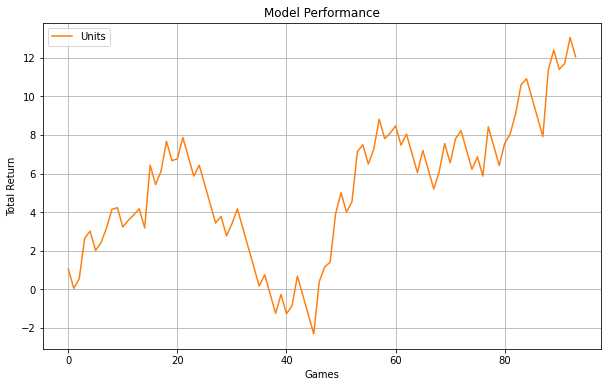

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(series.CumulativeReturn, color='tab:orange', label='Units')

# Same as above
ax.set_xlabel('Games')
ax.set_ylabel('Total Return')
ax.set_title('Model Performance')
ax.grid(True)
ax.legend(loc='upper left');
plt.show()